<img src="./img/HWNI_logo.svg"/>

# Plotting with Seaborn

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Plotting-with-Seaborn" data-toc-modified-id="Plotting-with-Seaborn-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plotting with Seaborn</a></div><div class="lev2 toc-item"><a href="#Visualizing-Summary-Statistics" data-toc-modified-id="Visualizing-Summary-Statistics-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Visualizing Summary Statistics</a></div><div class="lev3 toc-item"><a href="#Boxplots" data-toc-modified-id="Boxplots-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Boxplots</a></div><div class="lev3 toc-item"><a href="#Bar-Charts" data-toc-modified-id="Bar-Charts-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Bar Charts</a></div><div class="lev4 toc-item"><a href="#Categorical-Bar-Charts" data-toc-modified-id="Categorical-Bar-Charts-1121"><span class="toc-item-num">1.1.2.1&nbsp;&nbsp;</span>Categorical Bar Charts</a></div><div class="lev2 toc-item"><a href="#Visualizing-Distributions" data-toc-modified-id="Visualizing-Distributions-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Visualizing Distributions</a></div><div class="lev3 toc-item"><a href="#Histograms-and-Density-Estimates" data-toc-modified-id="Histograms-and-Density-Estimates-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Histograms and Density Estimates</a></div><div class="lev4 toc-item"><a href="#Histograms-and-Density-Estimates-by-Category" data-toc-modified-id="Histograms-and-Density-Estimates-by-Category-1211"><span class="toc-item-num">1.2.1.1&nbsp;&nbsp;</span>Histograms and Density Estimates by Category</a></div><div class="lev4 toc-item"><a href="#Joint-Histograms-and-Densities" data-toc-modified-id="Joint-Histograms-and-Densities-1212"><span class="toc-item-num">1.2.1.2&nbsp;&nbsp;</span>Joint Histograms and Densities</a></div><div class="lev4 toc-item"><a href="#Advanced:-Faceted-Joint-Densities" data-toc-modified-id="Advanced:-Faceted-Joint-Densities-1213"><span class="toc-item-num">1.2.1.3&nbsp;&nbsp;</span>Advanced: Faceted Joint Densities</a></div><div class="lev3 toc-item"><a href="#Scatter-Plots" data-toc-modified-id="Scatter-Plots-122"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Scatter Plots</a></div><div class="lev4 toc-item"><a href="#By-Category" data-toc-modified-id="By-Category-1221"><span class="toc-item-num">1.2.2.1&nbsp;&nbsp;</span>By Category</a></div><div class="lev4 toc-item"><a href="#Joint-Scattering" data-toc-modified-id="Joint-Scattering-1222"><span class="toc-item-num">1.2.2.2&nbsp;&nbsp;</span>Joint Scattering</a></div><div class="lev2 toc-item"><a href="#Visualizing-Linear-Models" data-toc-modified-id="Visualizing-Linear-Models-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Visualizing Linear Models</a></div>

## Introduction

Visualizing data is just as important as analyzing it statistically. In addition to helping you communicate your findings to others, it also helps you interpret your own data before and during rigorous statistics.

As such, a major goal of this course is for you to learn to create many different kinds of high-quality data visualizations.

We'll be using two tools to do our plotting in this course: [matplotlib](http://matplotlib.org/), a lower-level plotting library that will give us total control of our plots, and [seaborn](http://seaborn.pydata.org/index.html), a higher-level library built on top of matplotlib that is designed to make data science plots as easy as possible. Since the focus in the course will be on using seaborn, the focus in this notebook is on that library.

Unlike the other tutorial documents, this is intended as a reference for your use during the first few weeks of the course. There's no need to read through the entire document before starting the first lab. Instead, return here when as directed when you come across new plotting techniques in the labs.

You might find it helpful to go through the [seaborn plotting tutorial](http://seaborn.pydata.org/tutorial.html#plotting-functions) as well. This notebook is more compact and focused on the things we need in the class, but the tutorial is more thorough and complete.

Since seaborn uses pandas dataframes, it'd be best to work through the beginning of the notebook on pandas before looking at this one.

Let's get started by importing everything we need.

In [ ]:
# makes our plots show up inside Jupyter
%matplotlib inline

# numpy - linear algebra and matrices for python
import numpy as np

# pandas - "DataFrames" to organize our data
import pandas as pd

# matplotlib - workhorse plotting library
import matplotlib.pyplot as plt

# seaborn - easy plotting for statistical visualizations
#   based off of matplotlib
import seaborn as sns

# choose colors that work for most color-blind folks
sns.set_palette("colorblind")

sns.set(color_codes=True)

# this makes our tables easier to read
from IPython.core.display import HTML
css = open('./css/style-table.css').read()
#this line has to be the last in its cell
HTML('<style>{}</style>'.format(css)) 

Now, let's pull in some data. We'll be using the [`iris` dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), a classic "demonstration" data set that goes back to a 1936 paper by Ronald Fisher, one of the founders of modern statistics.

Each row represents the observations associated to a single flower of the genus _Iris_. Four of the columns contain anatomical measurements -- the length and width of the flower's petal and sepal (see diagram below). The last column tells us what species the flower is.

In [2]:
iris = sns.load_dataset('iris')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<img src="./img/flowanatomy.png" width=33%/>

Image credit: [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Sepal2_%28PSF%29.png).

## Visualizing Summary Statistics

### Boxplots

One of the easiest plotting experiences in seaborn is the boxplot, so we'll start there.

For the boxplot function, we can pass in a whole DataFrame, and seaborn will plot each column as a different box.

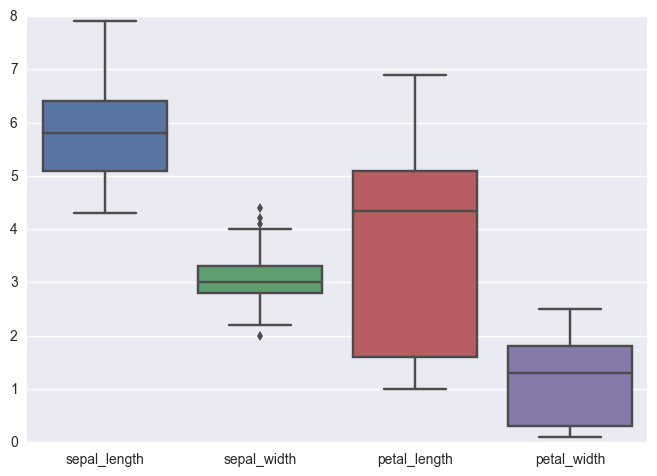

In [3]:
plot = sns.boxplot(data=iris,);

We can also plot just one column at a time. The result is kind of ugly:

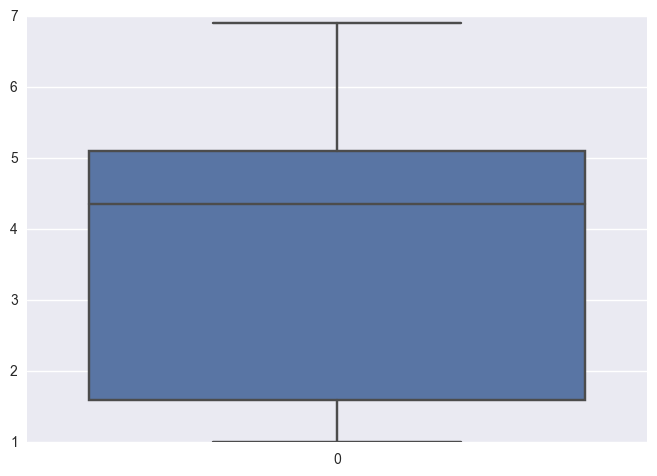

In [4]:
plot = sns.boxplot(data=iris.petal_length,);

If we want to make it cleaner, we need to use some pyplot functions:

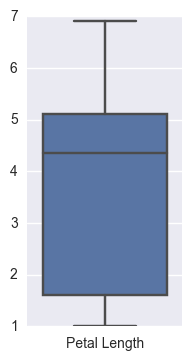

In [5]:
#make a figure that's longer than it is wide
figure = plt.figure(figsize=(2,4))

plot = sns.boxplot(data=iris.petal_length,);

#now Get Current Axis (tell me which axis was most recently plotted in)
axis = plt.gca()

# and give it the correct tick labels
axis.set_xticklabels(['Petal Length']);

Seaborn's boxplot also lets us break our data down into subgroups and produce boxplots for each subgroup. Here, we split the `iris` data by species, then make boxplots to compare petal lengths across species.

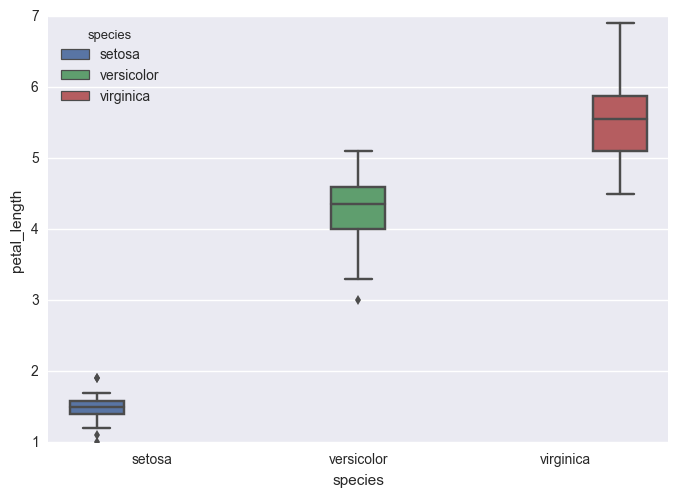

In [6]:
plot = sns.boxplot(
                    #x-axis comes from species column
                    x="species",
    
                    #y-axis comes from petal_length column
                    y="petal_length",
                    
                    #we want to split up our data by species 
                    # and we represent group membership with color, or "hue"
                    hue="species",
    
                    data=iris,);

### Bar Charts

A barplot (with or without error bars) is just as easy as a boxplot. The cell below has a lot written in it because I've started to bring in more arguments that let me adjust the style to my liking, but if you just wanted the default barplot you could simply enter:

```
   sns.barplot(data=iris,ci=None)
```

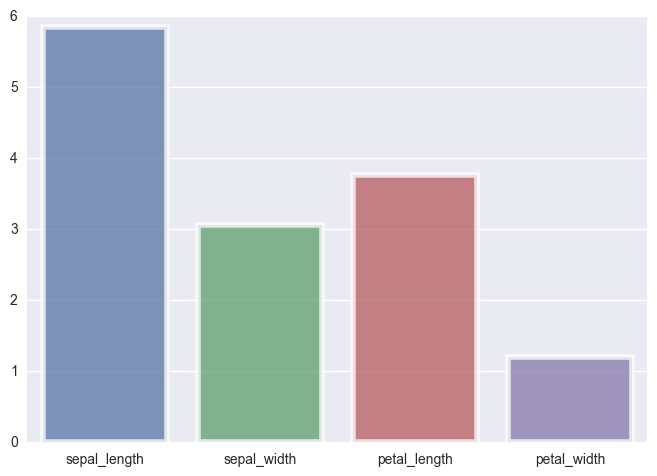

In [7]:
sns.barplot(data=iris,
            
            #hold off on plotting error bars
            ci=None,
           
            # let's start prettifying our plots.
            # the following are style arguments that get applied to every bar 
            
            # make the lines around each bar 4 points wide
            linewidth=4,
            
            # and make those lines white
            edgecolor="white",
            
            # make the bars and lines a little bit transparent
            alpha=0.75,
           );

Seaborn makes error bars using bootstrapping, which we'll learn about later in the course. Essentially, we boostrap by taking many random samples of your data, with replacement, and recalculating the bar height each time. Then, we draw our error bars to cover some large fraction (by default, 95%) of the heights that come out of that sampling procedure. Another common choice, especially when the bars represent the mean, is 68%. This is referred to as the "standard error" in general, or the "standard error of the mean" in the case of the mean.

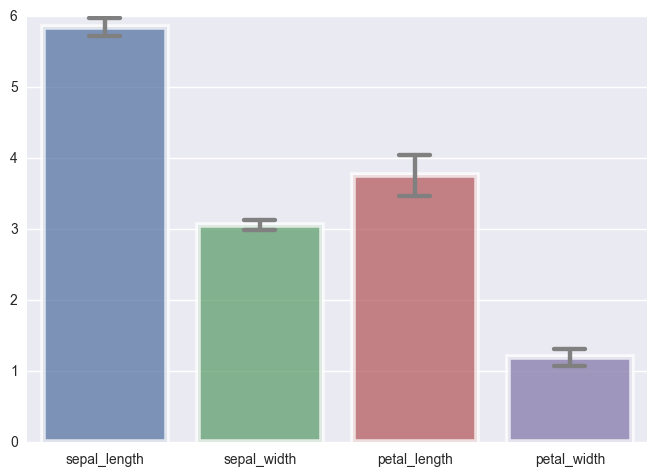

In [8]:
# take 1000 random samples of the data
numBootstraps = 10000

sns.barplot(data=iris,
            
            # plot error bars that cover 95% of bootstrap samples
            #  95 is the default value, so not including ci in your list of arguments
            #   will get you 95% CI error bars.
            #  using 68 will give you the standard error
            ci=95,
            
            # take numBootstraps samples
            n_boot=numBootstraps,
            
            # set the size of the horizontal "caps" on the error bars
            #  default is no caps
            capsize=.2,
            
            # we can color our error bars directly here; default is black
            errcolor="gray",
           
            # same style arguments as above
            linewidth=4,
            edgecolor="white",
            alpha=0.75,
           );

By default, the height of the bars is set by the mean value, but we aren't stuck with that. Using the `estimator` argument, we can pass in any function that takes in a vector of data and spits out a number, and the result of applying that function to our data would give us the heights of our bars. One example would be the median.

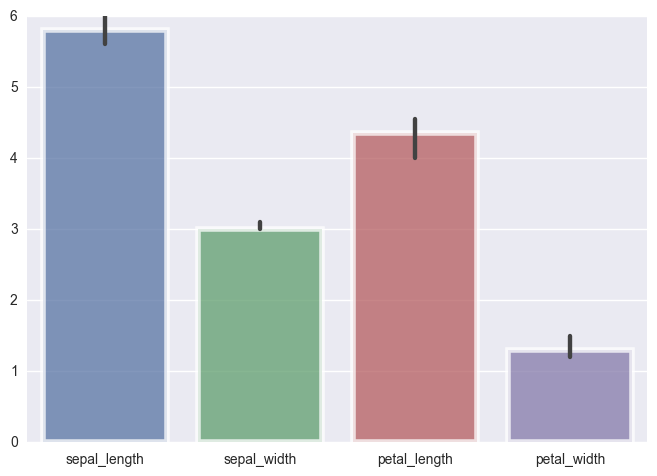

In [9]:
sns.barplot(data=iris,
            
            estimator=np.median,
            
            # same style arguments as above
            linewidth=4,
            edgecolor="white",
            alpha=0.75,
           );

But we can define our own estimators, if we'd like, and use them instead, no matter how silly they are, so long as they take in a vector and return a number.

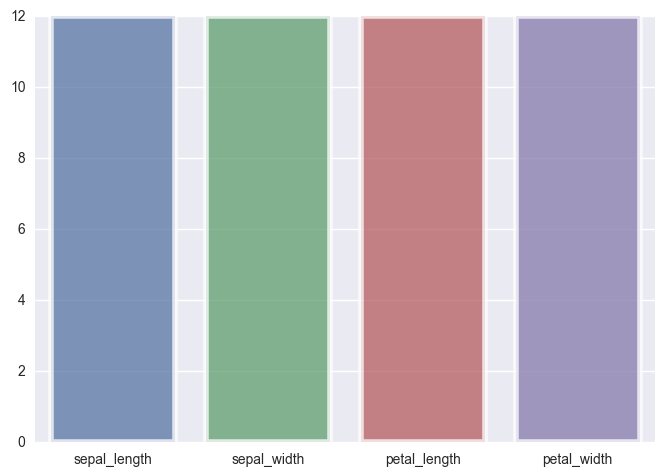

In [10]:
def twelve(input):
    return 12

sns.barplot(data=iris,
            
            estimator=twelve,
            
            # same style arguments as above
            linewidth=4,
            edgecolor="white",
            alpha=0.75,
           );

#### Categorical Bar Charts

We can do categorical bar charts in much the same way as we did categorical boxplots. In fact, all I had to do to get the code below was change `boxplot` to `barplot`. Neat!

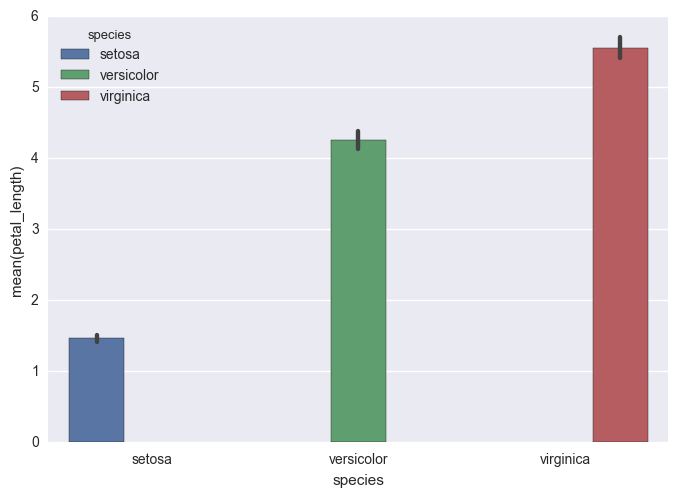

In [11]:
plot = sns.barplot(
                    #x-axis comes from species column
                    x="species",
    
                    #y-axis comes from petal_length column
                    y="petal_length",
                    
                    #we want to split up our data by species 
                    # and we represent group membership with color, or "hue"
                    hue="species",
    
                    data=iris,);

## Visualizing Distributions

Instead of plotting summaries of our data, like its mean or its median, we can plot our data directly using scatterplots, histograms, and density estimates.

For the latter two, we'll use the function `distplot`, which combines three functions:

- [`kdeplot`](http://seaborn.pydata.org/generated/seaborn.kdeplot.html), from seaborn, makes density estimates
- [`rugplot`](http://seaborn.pydata.org/generated/seaborn.rugplot.html), also from seaborn, makes 1-D scatter plots called "rug plots"
- [`hist`](http://matplotlib.org/api/pyplot_api.html), from matplotlib, makes histograms. NOTE: after clicking the link, you'll need to CTRL-F "`.hist(`" to find `hist`.

### Histograms and Density Estimates

A basic histogram is just as easy as a basic boxplot.

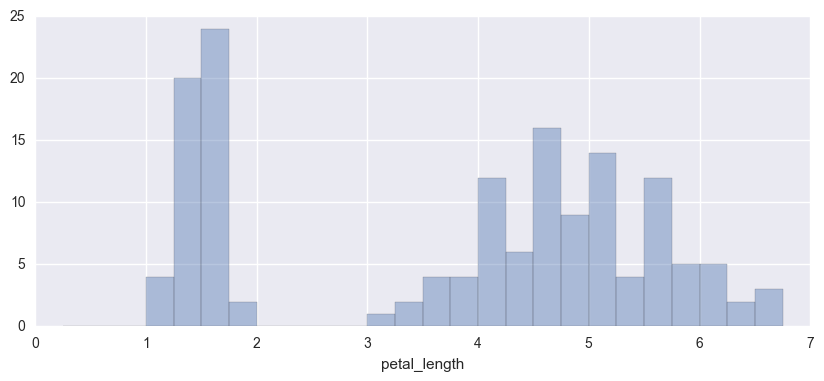

In [12]:
# histogram

# as before, we set the size of the figure by making it ahead of time with matplotlib

figure = plt.figure(
                    figsize=(10,4)
                    )

# the seaborn function distplot can plot histograms and density estimates
#  on top of each other. we'll just do the histogram for now

plot = sns.distplot(
                    # use the petal lengths data
                    iris.petal_length,
    
                    # plot histogram, don't plot density estimate or rug
                    hist=True, kde=False, rug=False,
    
                    # evenly spaced bins from 0 to 7 with width 0.25
                    bins = np.arange(0,7,0.25),
    
                    # use the style we described above
                   )

The function used to make histograms is very flexible -- it can make histograms or density estimates or both at the same time. So when we want to describe the style of our histogram, we can't just pass it in as a series of keyword arguments like we did for bar charts above. Instead, we need to package those arguments in something called a *dictionary* and then give that dictionary to `distplot` as an argument called `hist_kws`. This is short for "histogram keywords" or "keyword arguments for the histogram function".

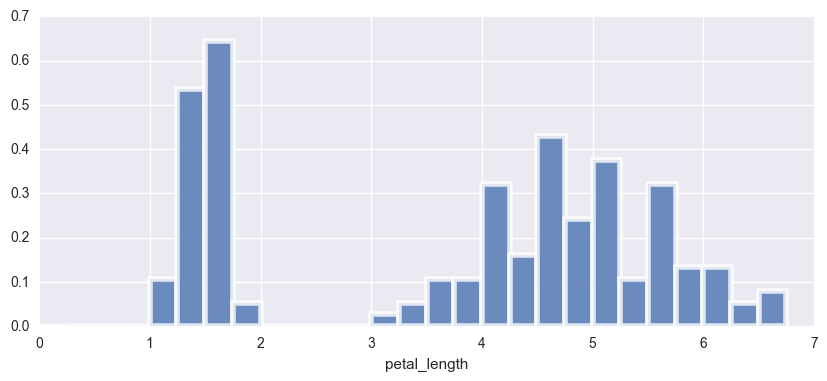

In [13]:
# histogram

figure = plt.figure(figsize=(10,4),)

# styling for the histogram
#  to see all possible options, check out
#  the documentation for matplotlib's hist function

# this is a "dictionary" -- like an array or list,
#  but you use strings to index values, instead of numbers

histogram_parameters = {# "keyword":value
    
                        # how thick should the outlines be?
                        "linewidth":4,
    
                        # what color should the outlines be?
                        "edgecolor":"white",
    
                        # how opaque are the bars? 
                        # 1 - totally opaque, 0 - invisible
                        "alpha":0.8,
    
                        # normalize to 1
                        "normed":True,
                        }

# the seaborn function distplot can plot histograms and density estimates
#  on top of each other

plot = sns.distplot(
                    # use the petal lengths data
                    iris.petal_length,
    
                    # plot histogram, don't plot density estimate
                    hist=True, kde=False, 
    
                    # evenly spaced bins from 0 to 7 with width 0.25
                    bins = np.arange(0,7,0.25),
    
                    # use the style we described above
                    hist_kws=histogram_parameters
                   )

In addition to histograms, the `distplot` function will also perform [kernel density estimation](http://www.mvstat.net/tduong/research/seminars/seminar-2001-05/) with a Gaussian kernel. We'll learn more about this procedure during the course. You can think of density estimates loosely as "smoothed histograms".

/Users/charlesfrye/anaconda/envs/neur299/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


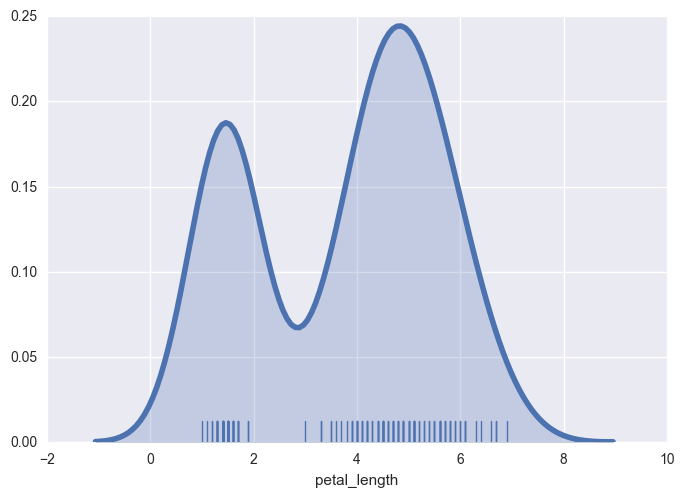

In [14]:
# density

# styling for the density plot
#  to see all options, check out the plt.plot documentation

# this is a "dictionary" -- like an array or list,
#  but you use strings instead of numbers

kde_parameters = {# "keyword":value
    
                    # how thick should the line be?
                    "linewidth":4,
    
                    # shade underneath the curve
                    "shade":True
                    }

# the same seaborn function can do density estimates

plot = sns.distplot(
                    # use the petal lengths data
                    iris.petal_length,
    
                    # don't plot histogram, do plot density estimate
                    hist=False, kde=True,
    
                    # add tick marks for data
                    rug=True,

                    # use the style we described above
                    kde_kws=kde_parameters,
                   )

#### Histograms and Density Estimates by Category

For boxplots and scatterplots, the built-in functions were able to subset our data for us. As of version 0.7, the version we're using in this class, seaborn's distplot function doesn't work this magic for us.

Luckily, seaborn comes with things called `FacetGrids` that at least make our job easier. FacetGrids hold onto our subsetted data and remember how we want to represent each subset. Then, we use a method called `map` that makes the same kind of plot for each facet, then brings all the plots together. 

Below, we'll plot a histogram of the `petal_length` for each species of iris.

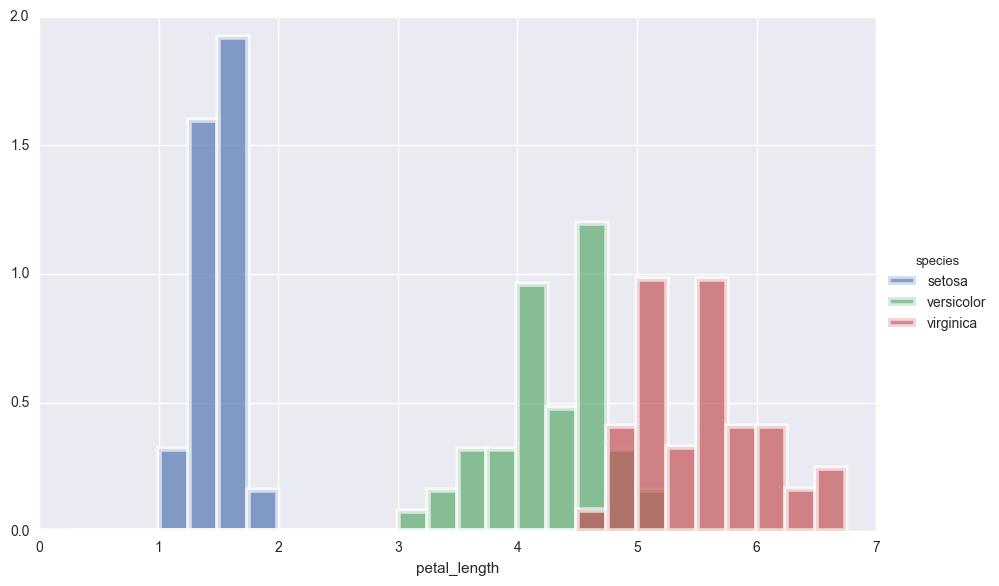

In [15]:
# histogram

histogram_parameters = {# "keyword":value
                        "linewidth":4,
                        "edgecolor":"white",
                        "alpha":0.67,
                        "normed":True,
                        }


# FacetGrid splits our data into "facets",
#  where each facet is a subset of our data
#  here, we subset using the "species" column

facets = sns.FacetGrid(
                     iris, #use the iris data
                     hue = "species", #split up by species
                     size = 6, # make the figure bigger
                     aspect = 1.5, # and make it wider than it is tall
                     )

# the "map" method applies the plotting function to each facet.
#  here, that means it makes a histogram for each facet.

plot = facets.map(
    # apply the histogram plotting function
    sns.distplot,
    
    # only apply to the petal length data
    "petal_length",
    
    # from here on, list the arguments to distplot
    
    # evenly spaced bins from 0 to 7 with width 0.25
    bins = np.arange(0,7,0.25),
    
    # plot histogram, don't plot density estimate
    hist=True, kde=False, 
    
    # use the style we described above
    hist_kws = histogram_parameters
            )

plot.add_legend(); #facet plots have an easy way to set legends

#### Joint Histograms and Densities

Often, we care about how two or more quantities vary together, or "jointly". This means we need to plot our data in two or more dimensions.

The best way to generalize a histogram to two dimensions is something called a "hexplot" -- instead of counting the number of observations in a box, you count the number of observations inside a hexagon.

Seaborn uses the function `jointplot` to plot two things that vary together. `jointplot` calls `distplot` which will call `hexbin`. Just as before, if we want to adjust the style of `hexbin`, we need to pass a dictionary of keyword arguments to `distplot` so that they can be passed to `hexbin`, but now we also need to pass a dictionary of keyword arguments to `jointplot` so that they can be passed to `distplot`. Note that the dictionary of arguments to `hexbin` is one of those arguments! 

The result is that we need to make two dictionaries -- keyword arguments for `distplot` and keyword arguments for `hist` -- and put the histogram keyword dictionary _inside_ the `distplot` keyword dictionary, like so:

In [16]:
distplot_parameters = {
                        # our histogram parameters are an argument to distplot
                        "hist_kws":histogram_parameters,
                        
                        # and so is bins
                       "bins":np.arange(0,10,0.25)
                      }

histogram_parameters = {
                        # how thick should the outlines be?
                        "linewidth":4,
    
                        # what color should the outlines be?
                        "edgecolor":"white",
    
                        # how opaque are the bars? 
                        # 1 - totally opaque, 0 - invisible
                        "alpha":0.67,
    
                        # normalize to 1
                        "normed":True,
                        }

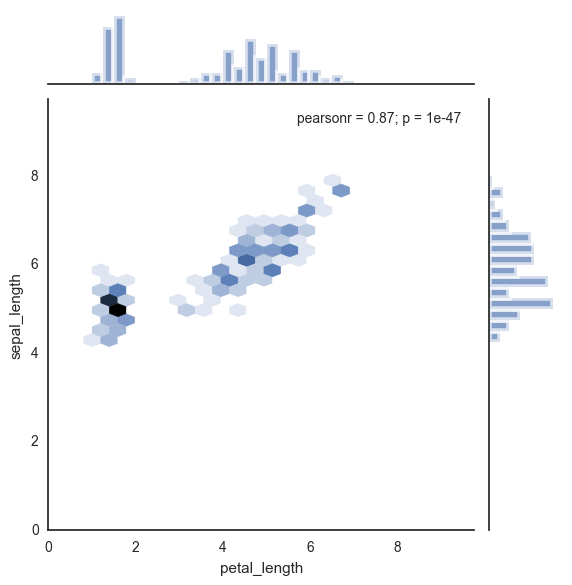

In [17]:
# PROTIP: you can use with blocks to change plot style briefly -- here, we're making the background white
with sns.axes_style("white"):
    plot = sns.jointplot(
                x=iris.petal_length, 
                y=iris.sepal_length, 
                kind="hex",
                marginal_kws = distplot_parameters,
                gridsize=15
    );

We can make joint densities as well.

/Users/charlesfrye/anaconda/envs/neur299/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


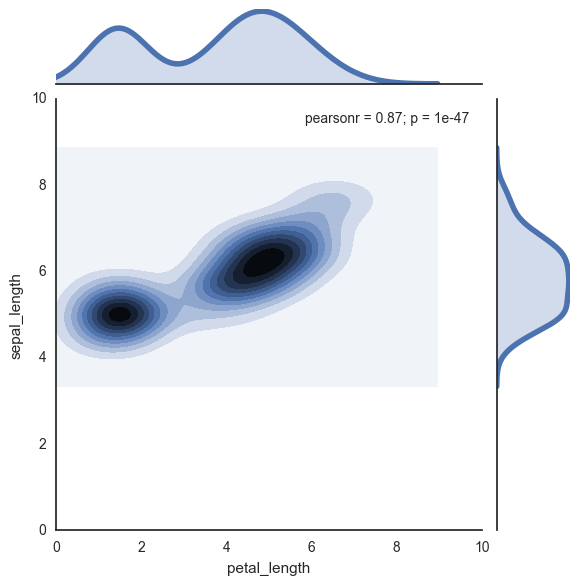

In [18]:
# density

distplot_parameters = {"kde_kws":kde_parameters}

kde_parameters = {
                  # how thick should the curve be?
                    "linewidth":4,
                        }


with sns.axes_style("white"):
    plot = sns.jointplot(
                x=iris.petal_length, 
                y=iris.sepal_length, 
                kind="kde",
                marginal_kws = kde_parameters,
    );

# control the axes with plot.ax_joint, plot.ax_marg_x, and plot.ax_marg_y
plot.ax_joint.set_xlim(0,10); plot.ax_joint.set_ylim(0,10);

#### Advanced: Faceted Joint Densities

You might want to put the above ideas together and build a plot for a faceted joint distribution. Unfortunately, that's not currently directly supported by seaborn. Seaborn does give you the tools to build all kinds of plots, but the degree of difficulty is a bit higher for anything that goes off the beaten path.

If we need a plot like this in the course, we'll provide an implementation, since the level of coding expertise required is above the level of the course. This section is included solely for those who come in with more experience and want to know how to use seaborn to its fullest potential.

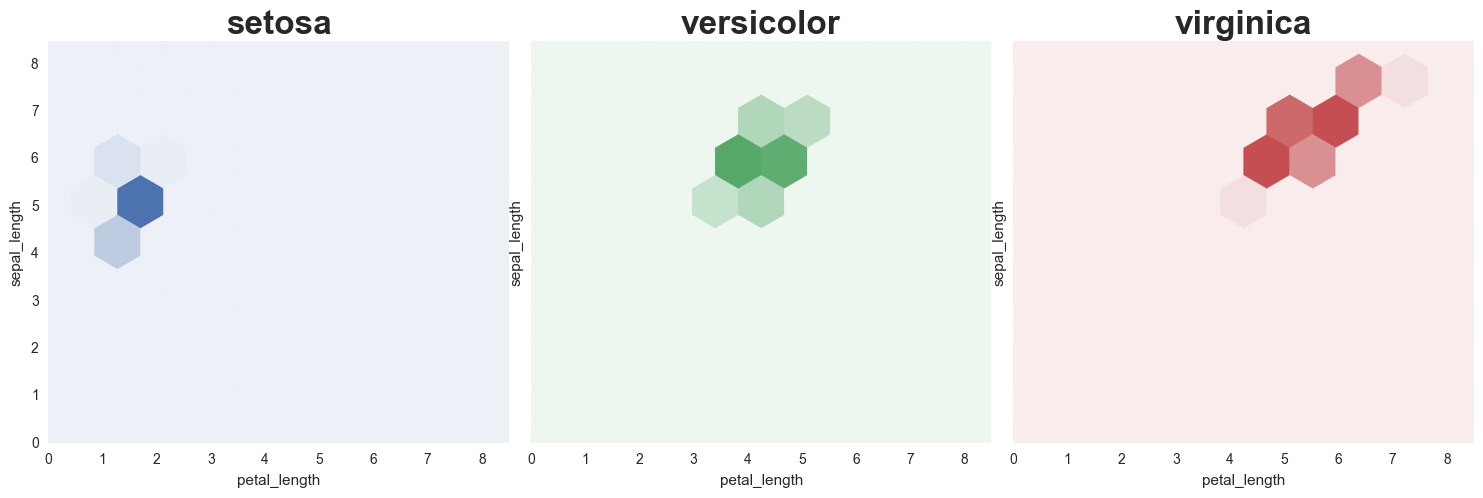

In [19]:
# we have to define our own version of the hexbin function

def joint_hex(x,y, # x and y are given by us, below
             color, # color will be provided by FacetGrid
             **kwargs): #**kwargs lets us add any other keyword arguments from plt.hexbin
    
    # define colormap here
    cmap = sns.light_palette(color, as_cmap=True) 
    
    # and then use matplotlib to make the chart
    plt.hexbin(x, y, cmap=cmap, **kwargs)

facets = sns.FacetGrid(
                     iris, #use the iris data
                     hue = "species", # color by species
                     col = "species", # and plot them in separate plots
                     size = 5, # make the figure bigger
                     )

xColumn = "petal_length"
yColumn = "sepal_length"

with sns.axes_style("white"):
    plots = facets.map(
                # apply our joint_hex plotting function to each facet
                joint_hex,
        
                # we provide x and y here, in order:
                xColumn,
                yColumn,
        
                # **kwargs go here, as many or as few as we want
                extent = [0,8.5,0,8.5],
                gridsize=10,
    );
    
# if we want to adjust the plots directly, e.g. to change axis limits,
#  we need to interact with the plots variable

# plots.axes is an array of axes. it's designed to hold a two-d grid of plots
#  plots[0] gives us the first row of plots -- for us, that's all of them.
#  plot[0,0] would give us the plot from the first column of the first row.

# here's an example of how to make axis-by-axis adjustments

for plot, species in zip(plots.axes[0], iris.species.unique()):
    
    plot.set_title(species,
                   fontweight="bold",
                   fontsize=24)
    
    plot.set_xlabel(xColumn); 
    plot.set_ylabel(yColumn)

### Scatter Plots

The one-dimensional version of a scatter plot is a rug plot, as covered above in the section on plotting densities, so we'll jump straight into subgrouping and joint scatters.

#### By Category

The seaborn `stripplot` function lets you easily make category-wise scatterplots of your data.

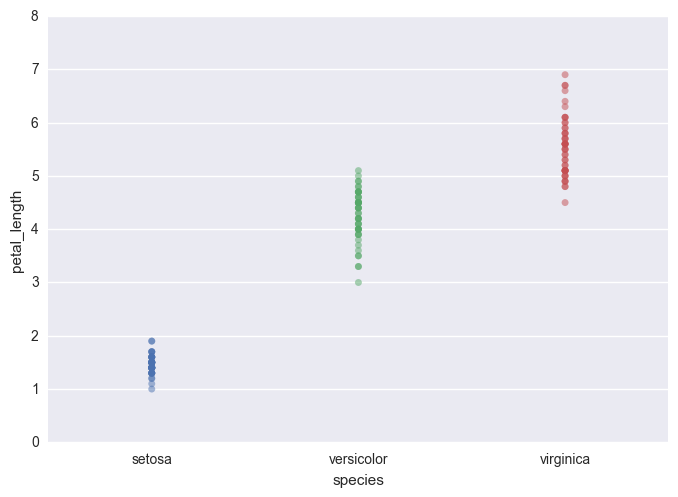

In [20]:
plot = sns.stripplot(
                    x=iris.species,
                    y=iris.petal_length,
                     
                    #setting alpha is useful here since points overlap a lot
                    alpha=0.5
                    );

We can make this plot easier to read by "jittering" the x-coordinate of each point by a small amount.

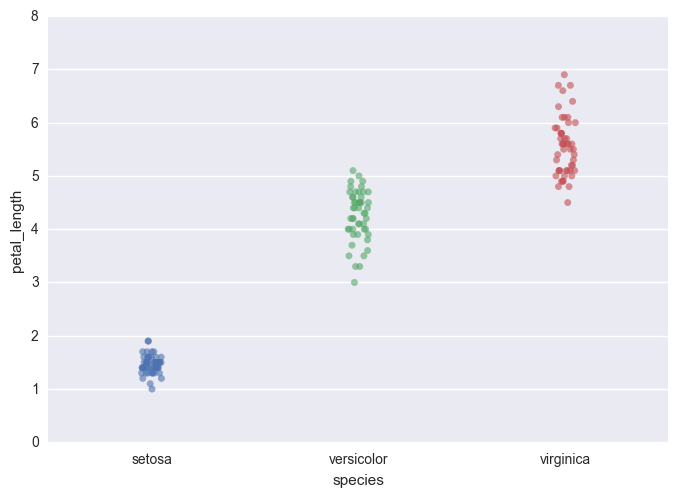

In [21]:
plot = sns.stripplot(
                    x=iris.species,
                    y=iris.petal_length,
                    
                    # how much should things be jittered by?
                    jitter=0.05,
    
                    # setting alpha to a higher value since points still overlap, but less
                    alpha=0.6,
                    );

Hot tip: we can plot multiple plots on the same axis. Strip plots and boxplots go nicely together. We can also rotate the plots so that categories are on the y axis.

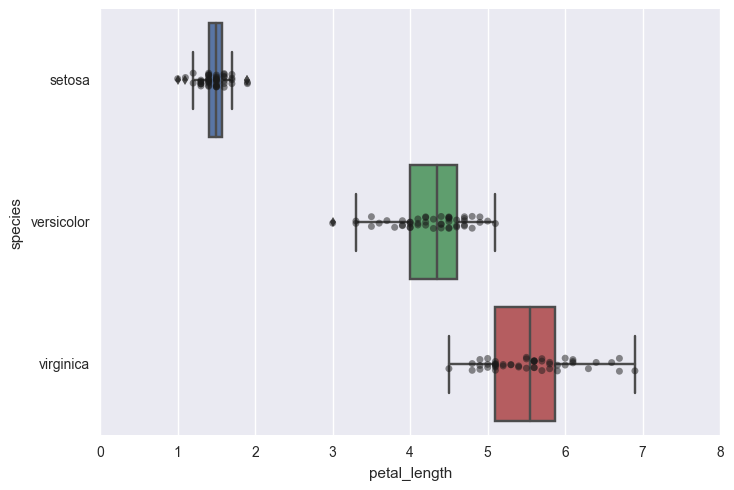

In [22]:
ax = sns.boxplot(
                y=iris.species,
                x=iris.petal_length
                )

ax = sns.stripplot(
                    y=iris.species,
                    x=iris.petal_length,
                    jitter=0.05,
                    color="k",
                    alpha=0.5
                    );

#### Joint Scattering

Showing the joint distribution of columns in a DataFrame is a common enough problem that seaborn has a function that does just that! `pairplot` generates bivariate scatterplots for each pair of columns in your dataset and plots them in a grid -- each row or column shows you one variable plotted against all the others. The diagonal plots are univariate histograms or density estimates.

These plots are less professional-looking, to say the least. This is intentional, as I messed around with some of the parameters to give you a better sense of the options that are available.

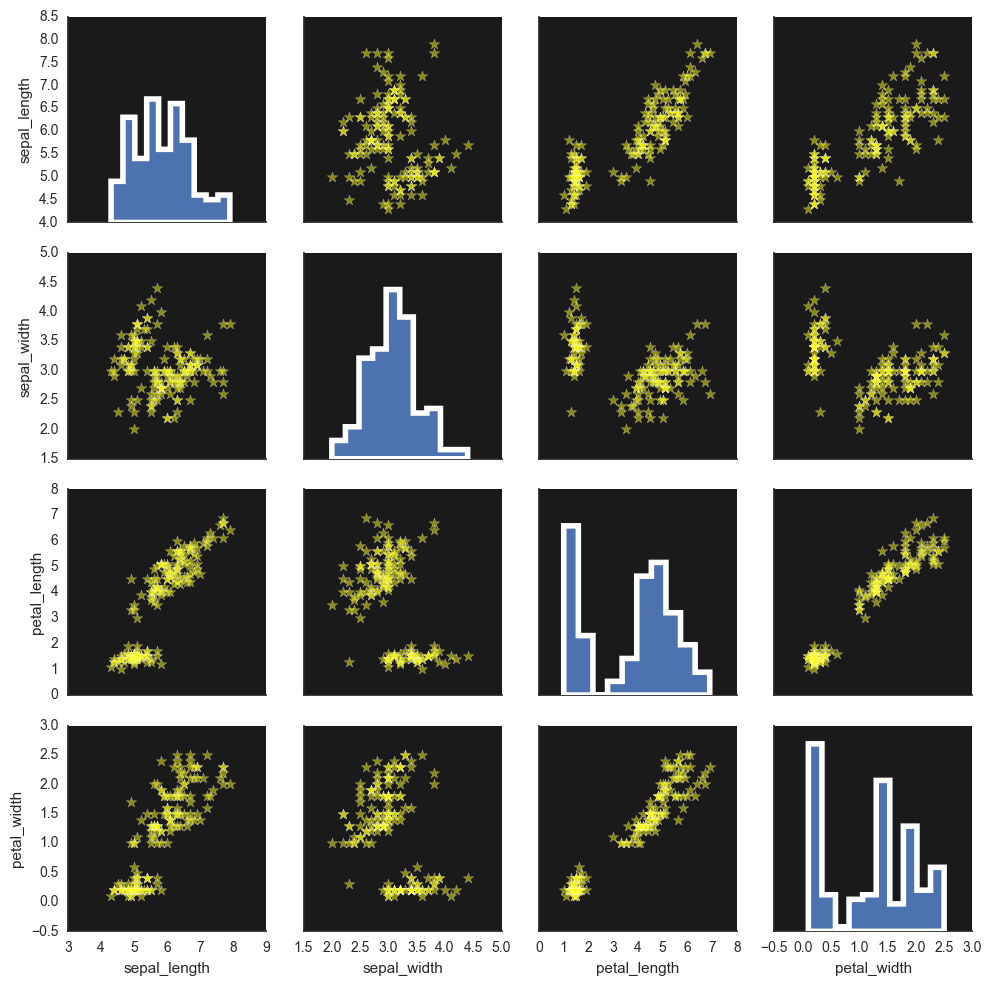

In [23]:
scatter_parameters = {
                        "alpha":0.5,
    
                        # star-shaped markers
                        "marker":"*",
    
                        # s is for size
                        "s":64,
    
                        # we can over-ride the color, 
                        #  which would otherwise be given by our choice of palette
                        "color":"yellow",
                        }

histogram_parameters = {
                        "linewidth":4,
                        "edgecolor":"white",
    
                        # one of several alternative histogram styles
                        "histtype":"stepfilled",
                        }

with sns.axes_style("white"):
    plot = sns.pairplot(iris,
             # we pass style parameters to the diagonal plots with diag_kws
            diag_kws = histogram_parameters,
             # and to the off-diagonal plots with plot_kws
             plot_kws = scatter_parameters,
            );
    
    # we can change certain plot features all at once!
    plot.set(axis_bgcolor="k");

That's a lot of plots! We can pick a smaller subset of our columns to plot against each other with the `vars` argument, and we can do kernel densities instead of histograms.

/Users/charlesfrye/anaconda/envs/neur299/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


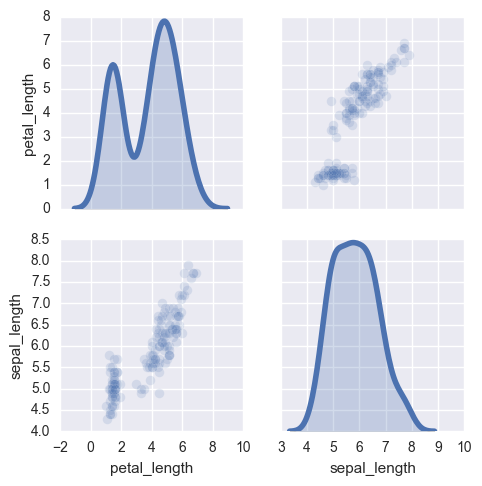

In [24]:
columns_to_plot = ["petal_length","sepal_length"]

scatter_parameters = {
                        "alpha":0.15,
                        "s":48,
                        }


kde_parameters = {
                        "linewidth":4,
                        "shade":True
                        }

sns.pairplot(iris,
            #vars is a list of column names that we want to plot
             vars=columns_to_plot,
             
             #let's plot a kernel density estimate this time
            diag_kind="kde",
            diag_kws = kde_parameters,
            plot_kws = scatter_parameters,
            );

Seaborn also makes it easy to subset your data while making pairplots.

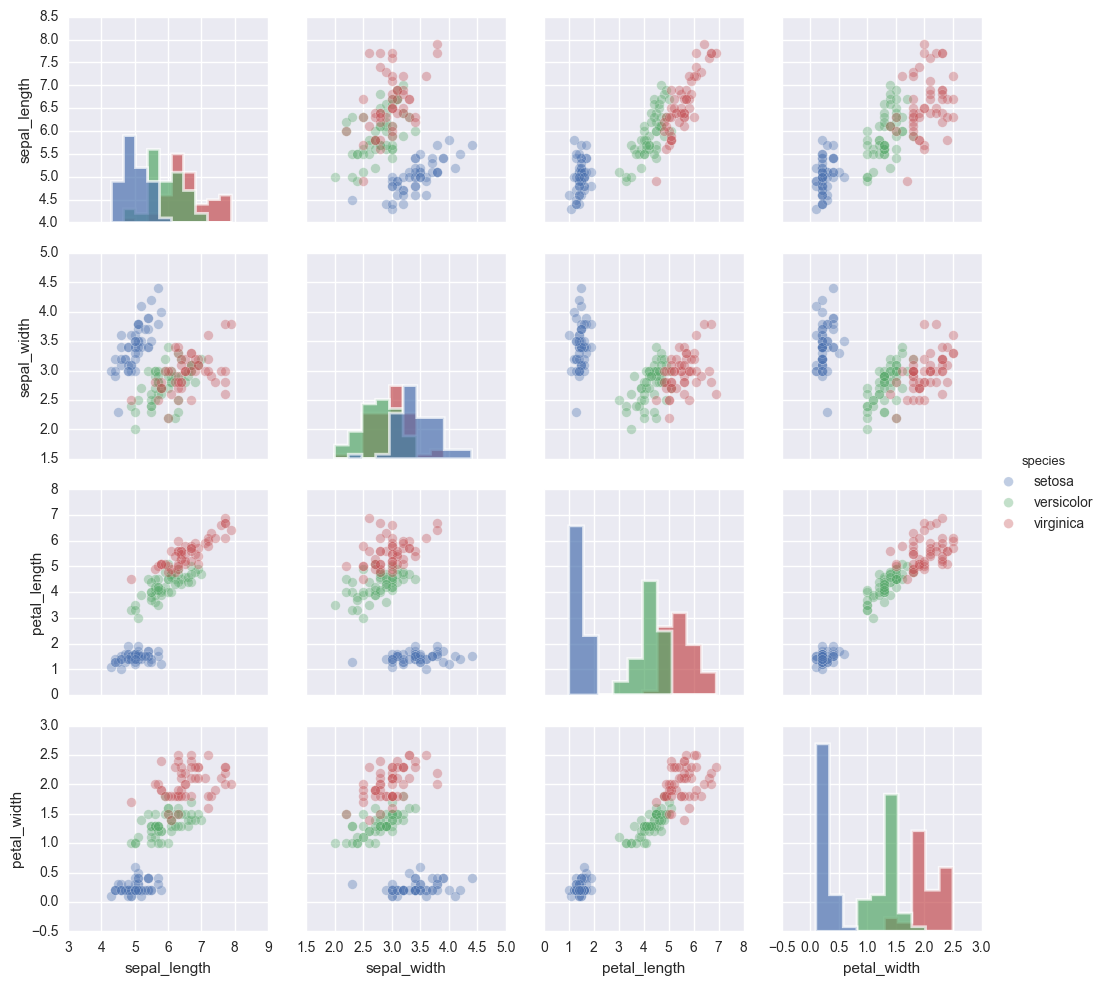

In [25]:
scatter_parameters = {
                        "alpha":0.35,
                        "s":48,
                        }

histogram_parameters = {
                        "alpha":0.7,
                        "linewidth":2,
                        "edgecolor":"white",
                        "histtype":"stepfilled",
                        }

sns.pairplot(iris,
            hue="species",
            diag_kws = histogram_parameters,
            plot_kws = scatter_parameters);

And picking out a subset of columns works in the exact same way.

/Users/charlesfrye/anaconda/envs/neur299/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


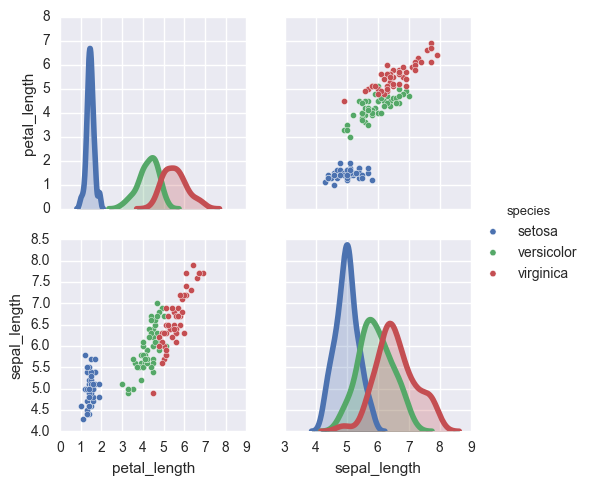

In [26]:
columns_to_plot = ["petal_length",
                 "sepal_length"]

kde_parameters = {
                    "linewidth":4,
                    "shade":True
                        }

sns.pairplot(iris,
            vars=columns_to_plot,
            hue="species",
            diag_kind="kde",
            diag_kws = kde_parameters,);

## Visualizing Linear Models

Later in the course, we'll be modeling our data. Seaborn has nice default functions for making most of the charts that we're interested in. This section is shorter than the others, since we'll be covering plotting linear models at the same time as we cover them in the course.

The `regplot` function performs a single linear regression on two variables, x and y.

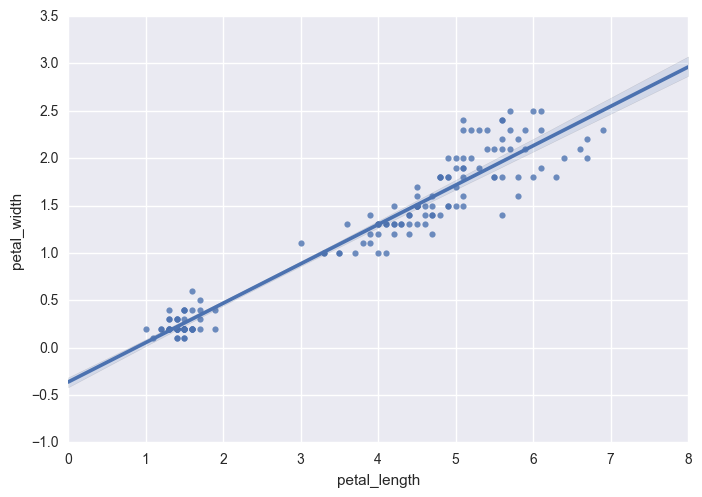

In [27]:
sns.regplot(data=iris,
            x="petal_length",
            y="petal_width",);

`lmplot` gets much fancier: it works with `FacetGrids`, so it can handle subsetting of data.

Both functions use boot-strapping to produce confidence intervals for the fit, plotting them as shaded areas around the mean value. These areas are just more visible in the plots below because the variability is greater with sub-setted data.

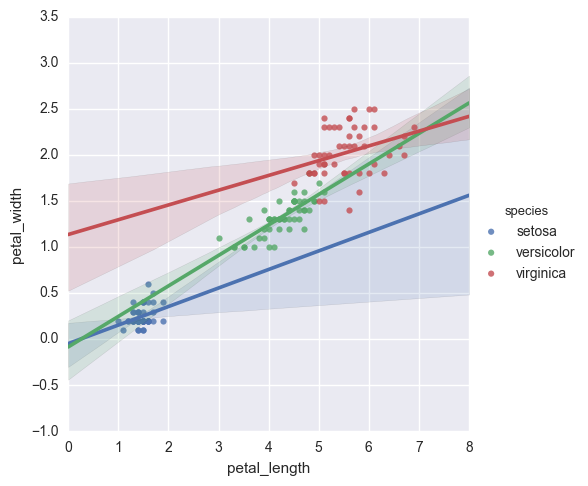

In [28]:
sns.lmplot(data=iris,
            x="petal_length",
            y="petal_width",
            hue="species",
           );

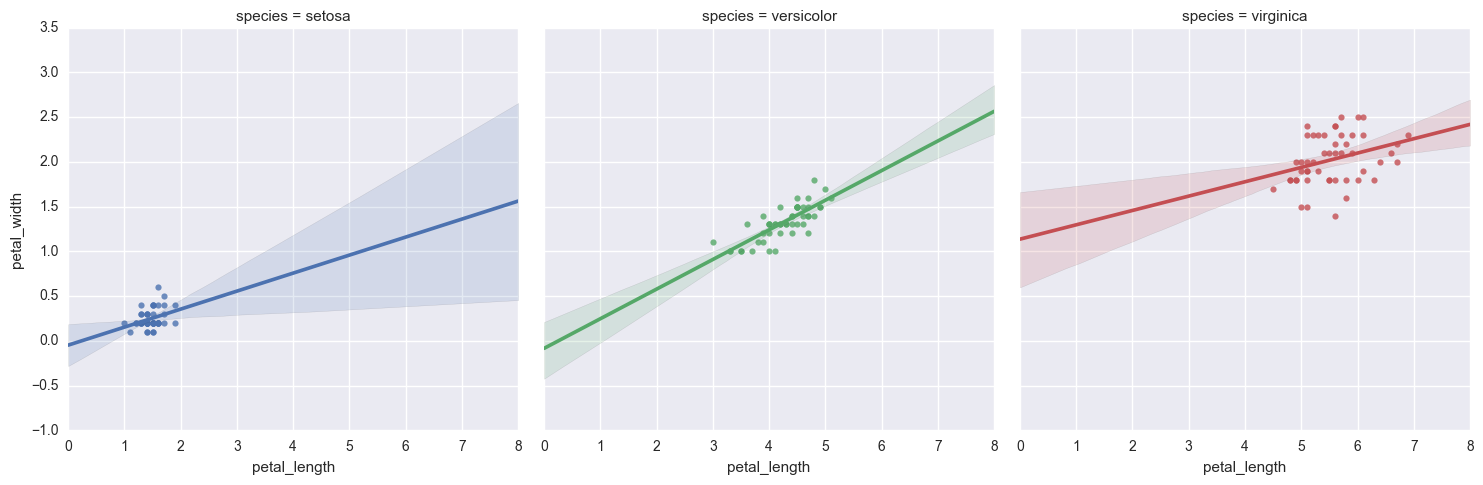

In [29]:
sns.lmplot(data=iris,
            x="petal_length",
            y="petal_width",
            col="species",
            hue="species",
           );